In [144]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [145]:
library('TSclust')

In [146]:
transform = function(ts){
    return (log(ts))
}

In [147]:
sept_cas = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$series[25:696], frequency=24)
sept_tot = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$total[25:696], frequency=24)

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [148]:
june_cas = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$series[49:720], frequency=24)
june_tot = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$total[49:720], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [149]:
sept_perc = sept_cas/sept_tot
june_perc = june_cas/june_tot

In [150]:
split_by_day = function(ts_month){
    days = data.frame(matrix(nrow=24, ncol=1))
    for (i in 1:(length(ts_month)/24)){
        days[[i]] = ts_month[((i-1)*24+1):(i*24)]
    }
    return(days)
}

In [151]:
sept_days = split_by_day(sept_perc)
colnames(sept_days) = c(2:29)

In [152]:
june_days = split_by_day(june_perc)
colnames(june_days) = c(103:130)

In [153]:
combined = cbind(sept_days, june_days)

In [154]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [155]:
weeks = data.frame(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4)

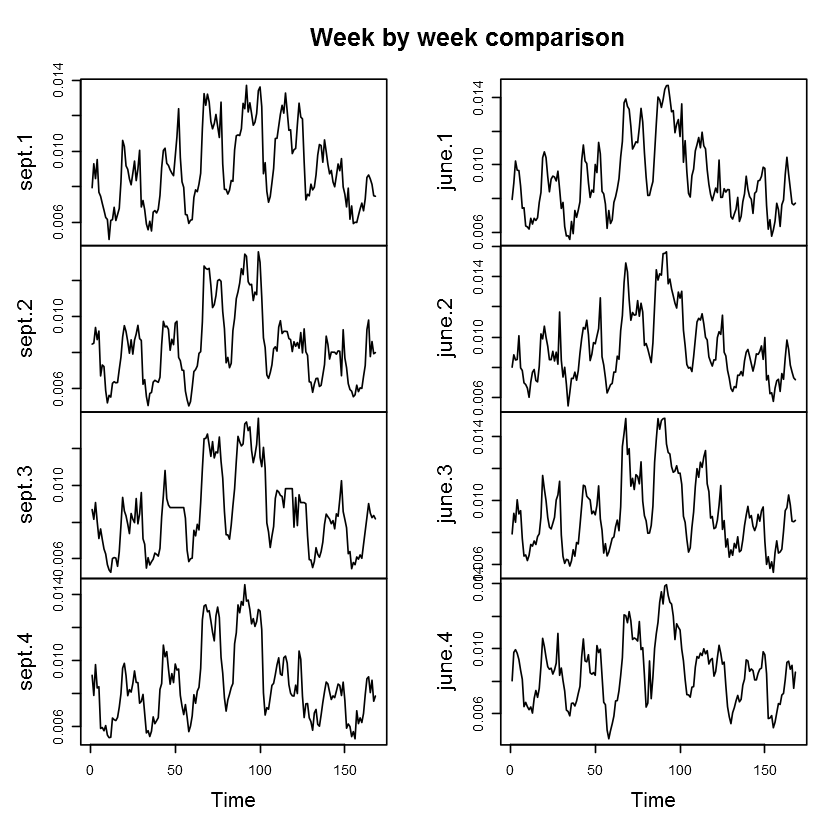

In [156]:
plot.ts(cbind(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4), main='Week by week comparison')

In [157]:
library('cluster')

In [158]:
diss(weeks, METHOD='DWT')

            sept.1      sept.2      sept.3      sept.4      june.1      june.2
sept.2 0.016741437                                                            
sept.3 0.015301812 0.008451498                                                
sept.4 0.015844131 0.009475112 0.009556598                                    
june.1 0.015859866 0.015535224 0.013780336 0.013426339                        
june.2 0.015686413 0.016026165 0.014408846 0.013827644 0.008744812            
june.3 0.015287628 0.016146467 0.015435290 0.013077713 0.010444052 0.010064765
june.4 0.014983800 0.009567756 0.010737788 0.011013875 0.014118921 0.013833080
            june.3
sept.2            
sept.3            
sept.4            
june.1            
june.2            
june.3            
june.4 0.013832231

June clusters into FSaSu and weekdays with both agglomerative and 2-mediods using eucl/per/dwt.

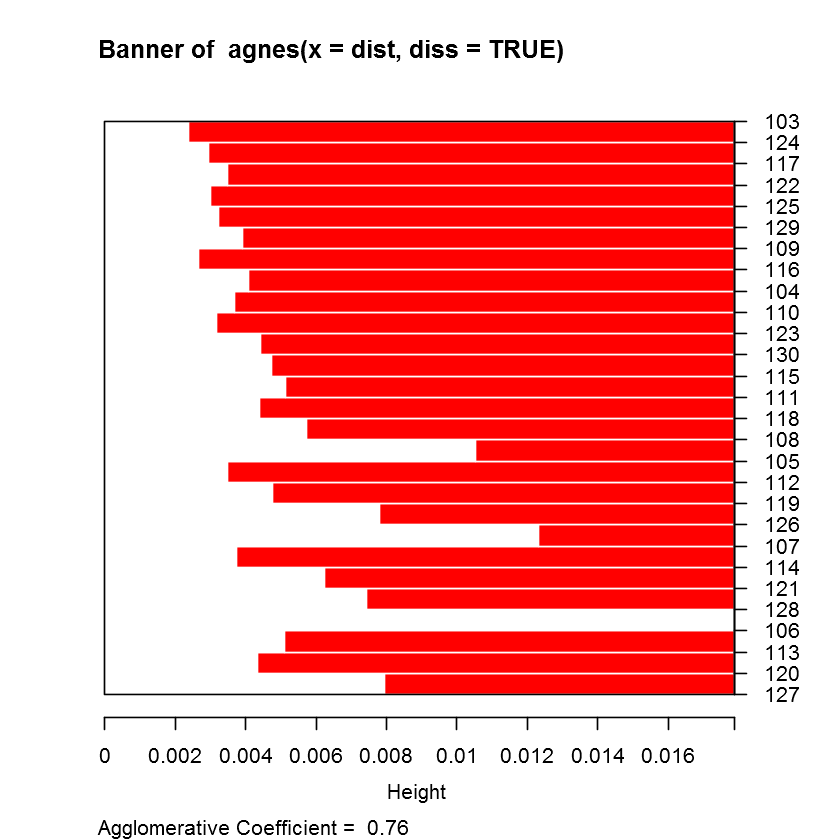

Medoids:
     ID        
[1,] "22" "124"
[2,] "25" "127"
Clustering vector:
103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 
  1   1   2   2   2   1   1   1   1   2   2   2   1   1   1   1   2   2   2   1 
123 124 125 126 127 128 129 130 
  1   1   1   1   2   1   1   1 
Objective function:
      build        swap 
0.005677552 0.005526164 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

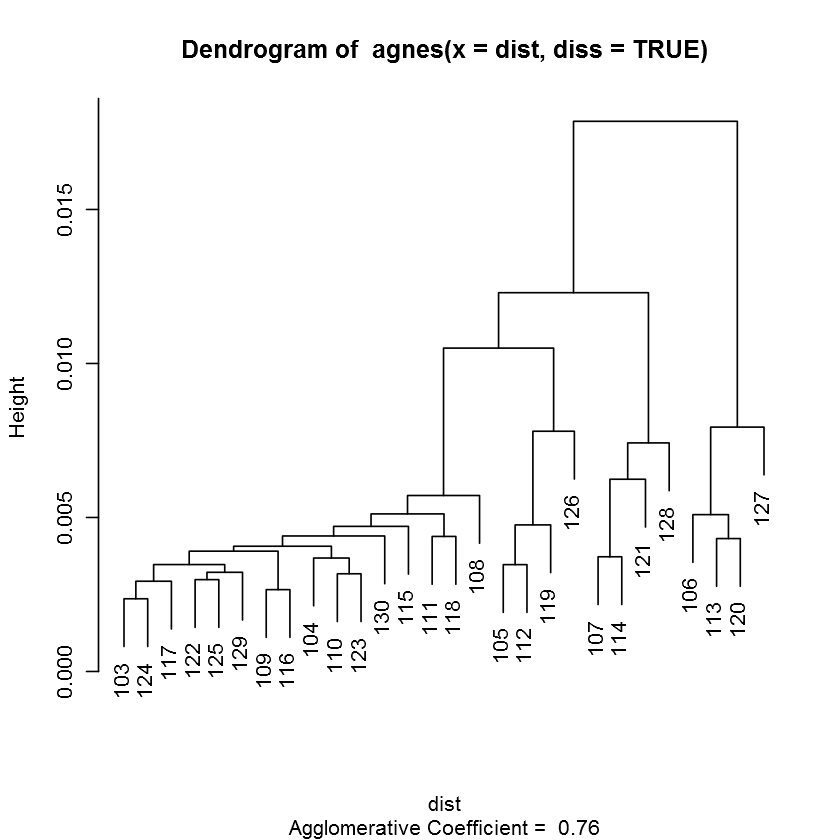

In [159]:
dist = diss(june_days, METHOD='EUCL')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

In [160]:
plot(abs(fft(combined[[]]))^2)[2:12]

ERROR: Error in (function(x, i, exact) if (is.matrix(i)) as.matrix(x)[[i]] else .subset2(x, : argument is missing, with no default


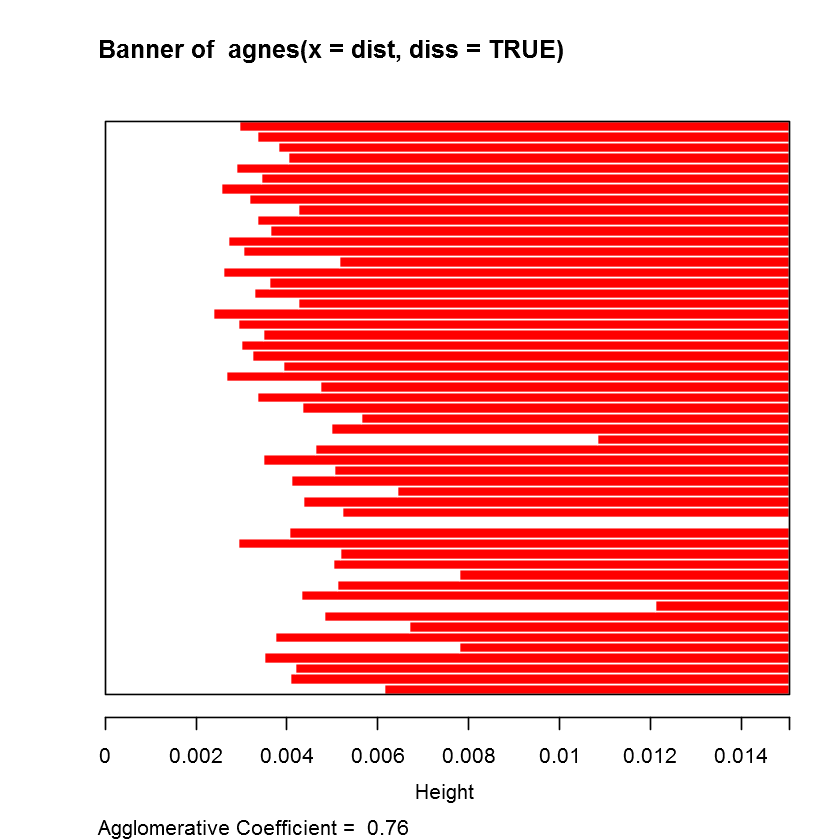

Medoids:
      ID        
 [1,] "8"  "9"  
 [2,] "31" "105"
 [3,] "18" "19" 
 [4,] "47" "121"
 [5,] "6"  "7"  
 [6,] "13" "14" 
 [7,] "52" "126"
 [8,] "24" "25" 
 [9,] "19" "20" 
[10,] "50" "124"
[11,] "39" "113"
[12,] "40" "114"
[13,] "36" "110"
Clustering vector:
  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
  1   1   2   3   4   5   6   1   1   7   3   5   6   1   1   1   8   3   9   6 
 22  23  24  25  26  27  28  29 103 104 105 106 107 108 109 110 111 112 113 114 
  1   1  10   8   3   5   1   1  10  10   2  11  12   6  10  13  13   2  11  12 
115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 
 10   6  10  10   8  11   4  10  13  10  10   7   3   5  10   1 
Objective function:
      build        swap 
0.002770952 0.002753147 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

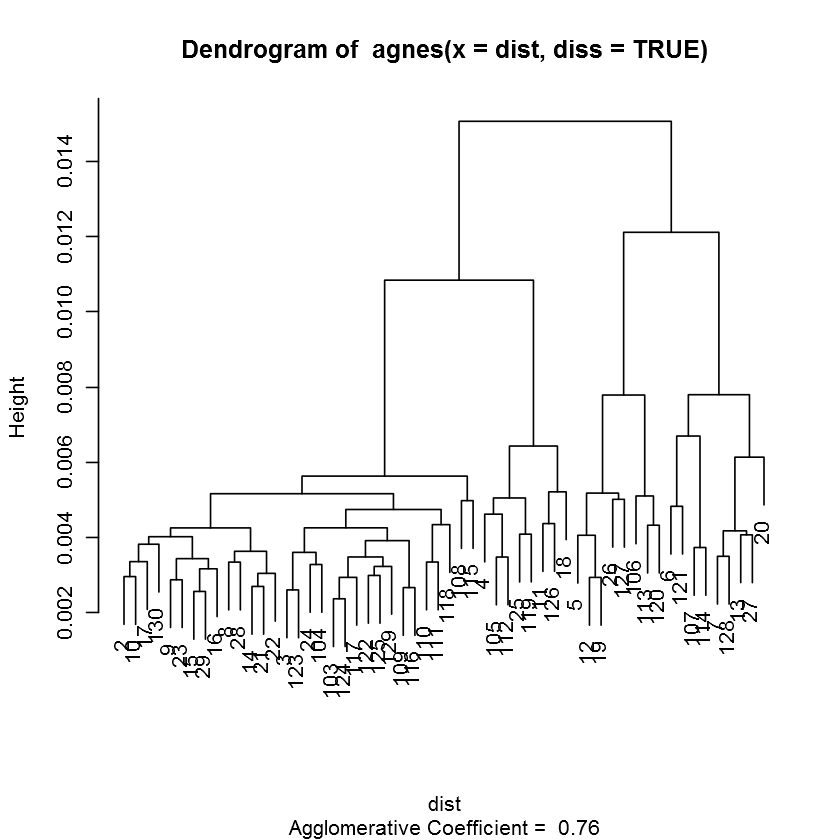

In [161]:
dist = diss(combined, METHOD='EUCL')
plot(agnes(dist, diss=TRUE))
pam(dist, 13, diss=TRUE)

In [38]:
dist

             sept.1       sept.2       sept.3       sept.4       june.1
sept.2 5.810488e-01                                                    
sept.3 1.132308e+00 1.043656e+00                                       
sept.4 1.426133e+00 1.365424e+00 9.620752e-01                          
june.1 1.490116e-08 5.810488e-01 1.132308e+00 1.426133e+00             
june.2 5.810488e-01 1.490116e-08 1.043656e+00 1.365424e+00 5.810488e-01
june.3 1.132308e+00 1.043656e+00 0.000000e+00 9.620752e-01 1.132308e+00
june.4 1.426133e+00 1.365424e+00 9.620752e-01 0.000000e+00 1.426133e+00
             june.2       june.3
sept.2                          
sept.3                          
sept.4                          
june.1                          
june.2                          
june.3 1.043656e+00             
june.4 1.365424e+00 9.620752e-01